# Loan Status Prediction With Python

The Loan Prediction Problem dataset from Kaggle is a widely used dataset in the field of machine learning. 
It comprises information about loan applicants, including attributes such as 
gender, marital status, education, income, loan amount, and credit history.
The goal is to predict whether a loan application should be approved or denied based on these features.
This dataset is often employed for practicing classification algorithms and evaluating model performance in
predicting loan outcomes.


# Importing the Dependancy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset =pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_dataset# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
cat_vars= loan_dataset.select_dtypes(include='object')
cat_vars.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


<Axes: >

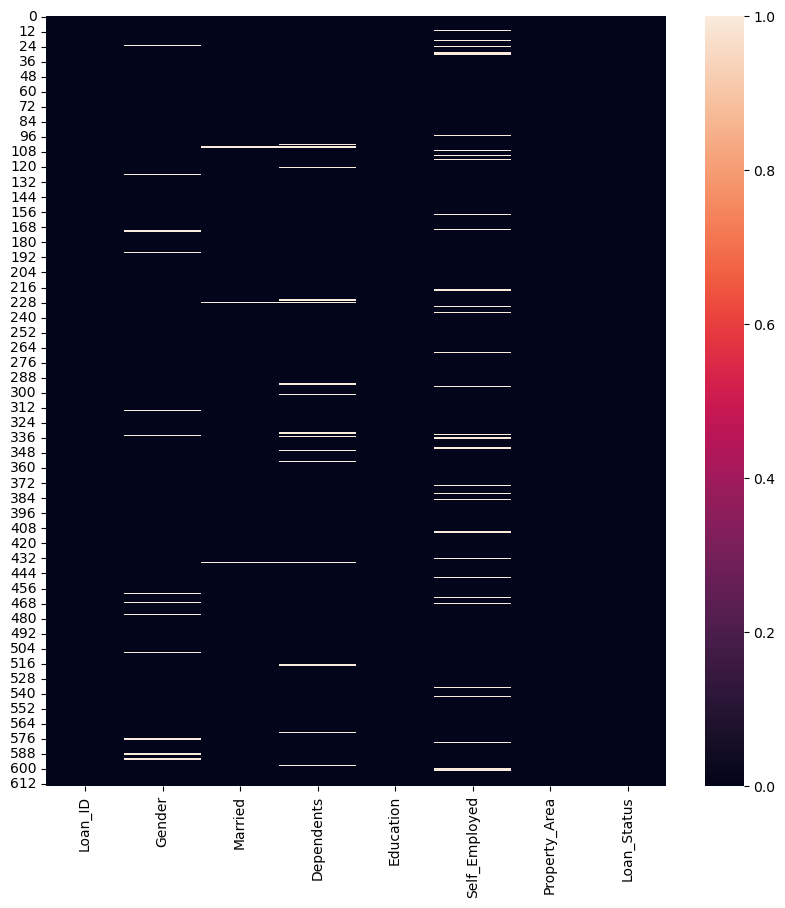

In [9]:
#Heatmap for integer and float datatype missing value
plt.figure(figsize=(10,10))
sns.heatmap(cat_vars.isnull())

In [10]:
null_var=loan_dataset.isnull().sum()/loan_dataset.shape[0]*100
null_var

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Now select data type which has object

In [11]:
cat_vars = loan_dataset.select_dtypes(include='object')
cat_vars.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


<Axes: >

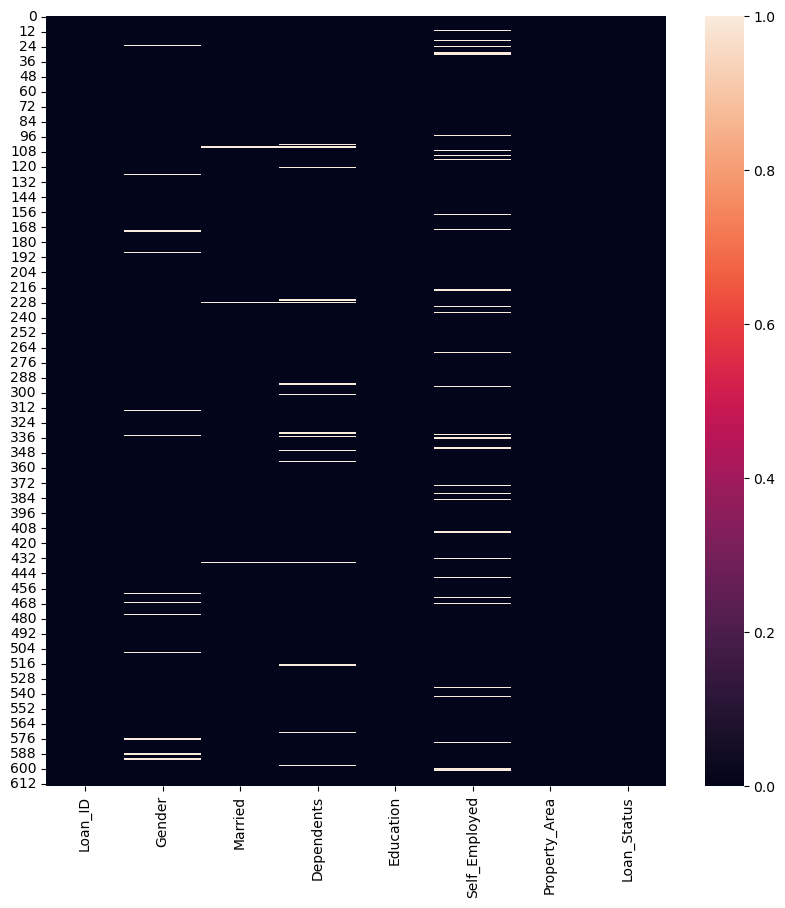

In [12]:
#Heatmap for object datatype missing value
plt.figure(figsize=(10,10))
sns.heatmap(cat_vars.isnull())

In [13]:
#checking for object
cat_vars.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [14]:
df3= cat_vars.isnull().mean()*100
df3

Loan_ID          0.000000
Gender           2.117264
Married          0.488599
Dependents       2.442997
Education        0.000000
Self_Employed    5.211726
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64

In [15]:
#fill GENDER Values with mode
cat_vars['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [16]:
cat_vars['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [17]:
cat_vars['Gender'].fillna(cat_vars['Gender'].mode()[0])

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [18]:
cat_vars['Gender'].fillna(cat_vars['Gender'].mode()[0]).value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [19]:
#fill DEPENDANTS Values with mode
cat_vars['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [20]:
cat_vars['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [21]:
cat_vars['Dependents'].fillna(cat_vars['Dependents'].mode()[0])

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [22]:
cat_vars['Dependents'].fillna(cat_vars['Dependents'].mode()[0]).value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [23]:
#fill MARRIED Values with mode
cat_vars['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [24]:
cat_vars['Married'].mode()

0    Yes
Name: Married, dtype: object

In [25]:
cat_vars['Married'].fillna(cat_vars['Married'].mode()[0])

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [26]:
cat_vars['Married'].fillna(cat_vars['Married'].mode()[0]).value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [27]:
#fill SELF_EMPLOYED Values with mode
cat_vars['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [28]:
cat_vars['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [29]:
cat_vars['Self_Employed'].fillna(cat_vars['Self_Employed'].mode()[0])

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [30]:
cat_vars['Self_Employed'].fillna(cat_vars['Self_Employed'].mode()[0]).value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [31]:
cat_vars_copy= cat_vars.copy()

for var in cat_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

Loan_ID = LP001002
Gender = Male
Married = Yes
Dependents = 0
Education = Graduate
Self_Employed = No
Property_Area = Semiurban
Loan_Status = Y


In [32]:
cat_vars_copy.isnull().sum().sum()

0

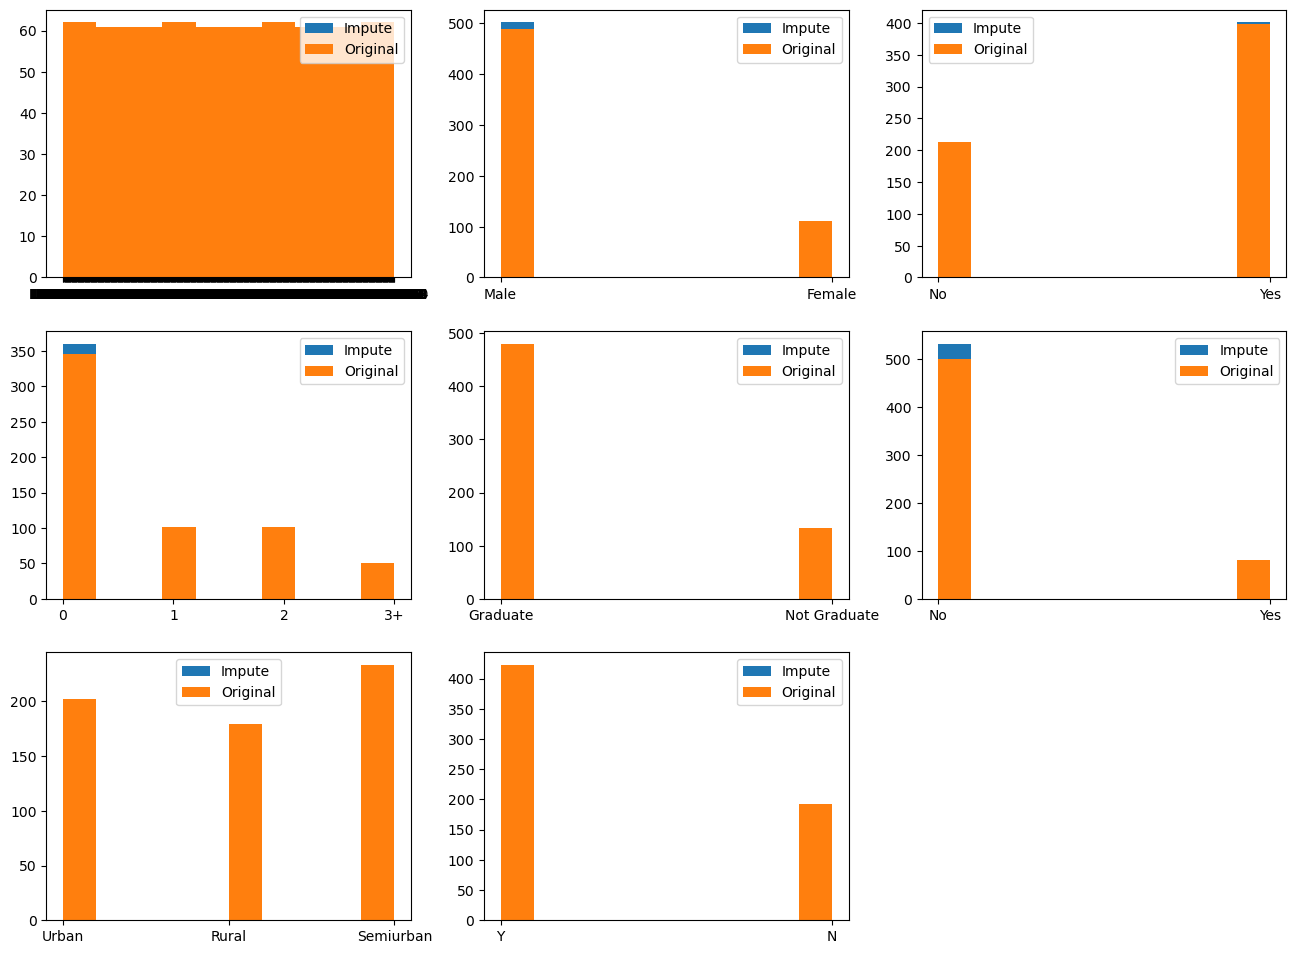

In [33]:
plt.figure(figsize=(16,16))
for i,var in enumerate(cat_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [34]:
# Replace the Original Dataset with the Mean and Mode

In [35]:
loan_dataset.update(cat_vars_copy)
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now select data type which has integer & float

In [36]:
df1=loan_dataset.select_dtypes(include=['int64','float64'])
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [37]:
df1.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

<Axes: >

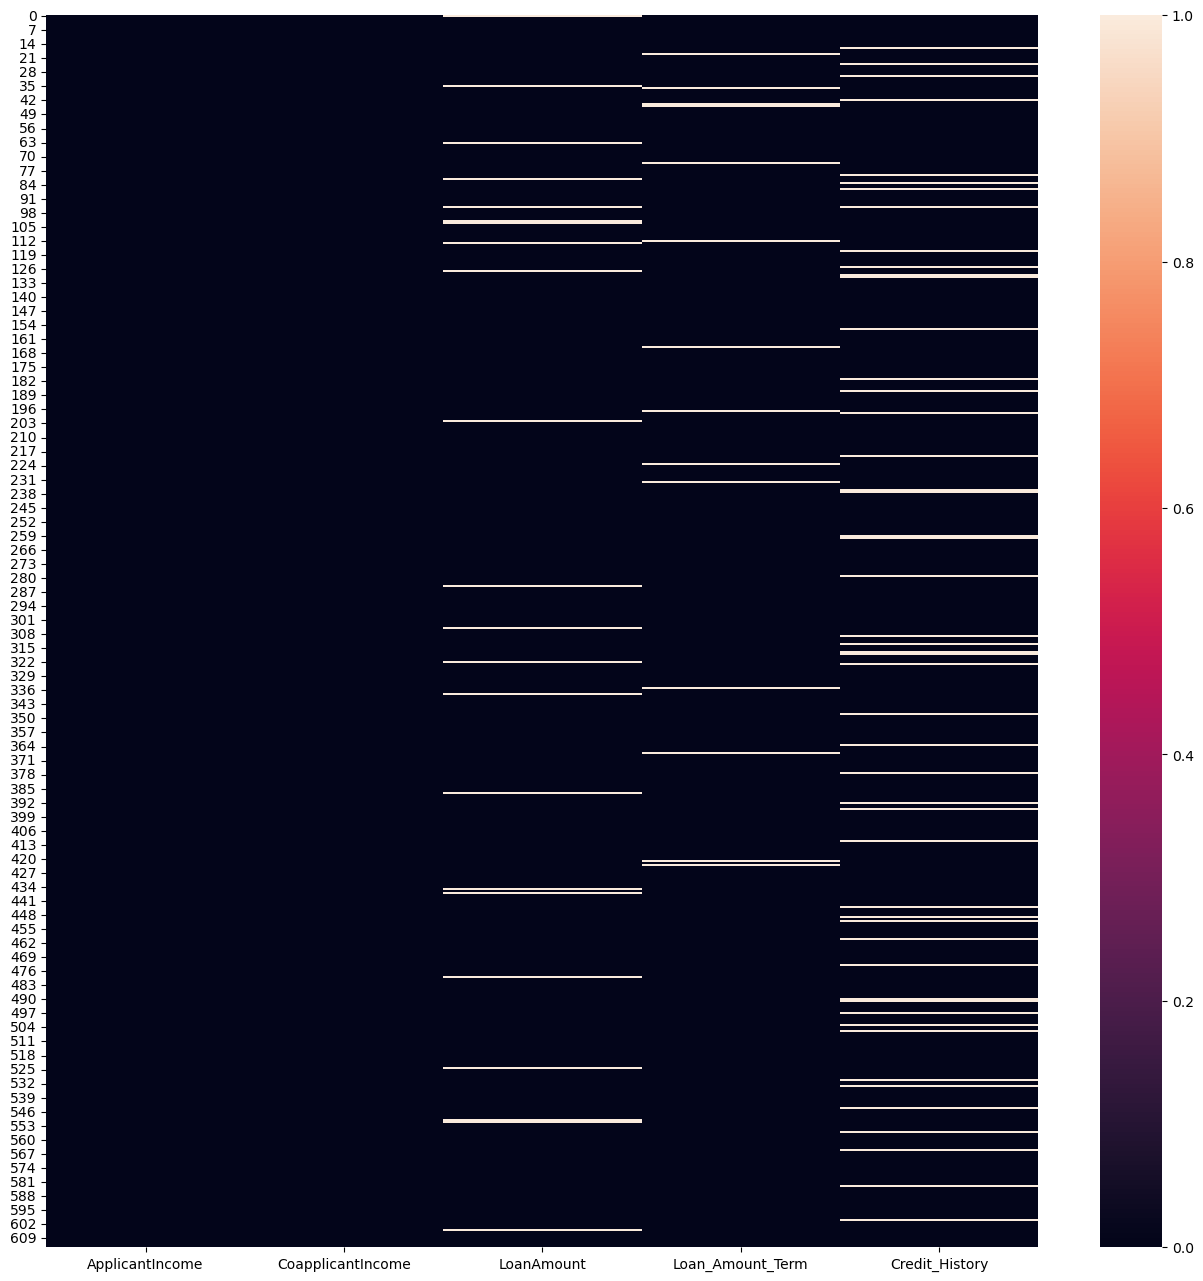

In [38]:
#Heatmap for integer and float datatype missing value
plt.figure(figsize=(16,16))
sns.heatmap(df1.isnull())

In [39]:
df2 = [var for var in df1.columns 
                   if df1[var].isnull().sum()>0]
df2

# We get  variable names that has values missing

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

C:\Users\deepa\AppData\Local\Temp\ipykernel_17452\1347159801.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,
C:\Users\deepa\AppData\Local\Temp\ipykernel_17452\1347159801.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,
C:\Users\deepa\AppData\Local\Tem

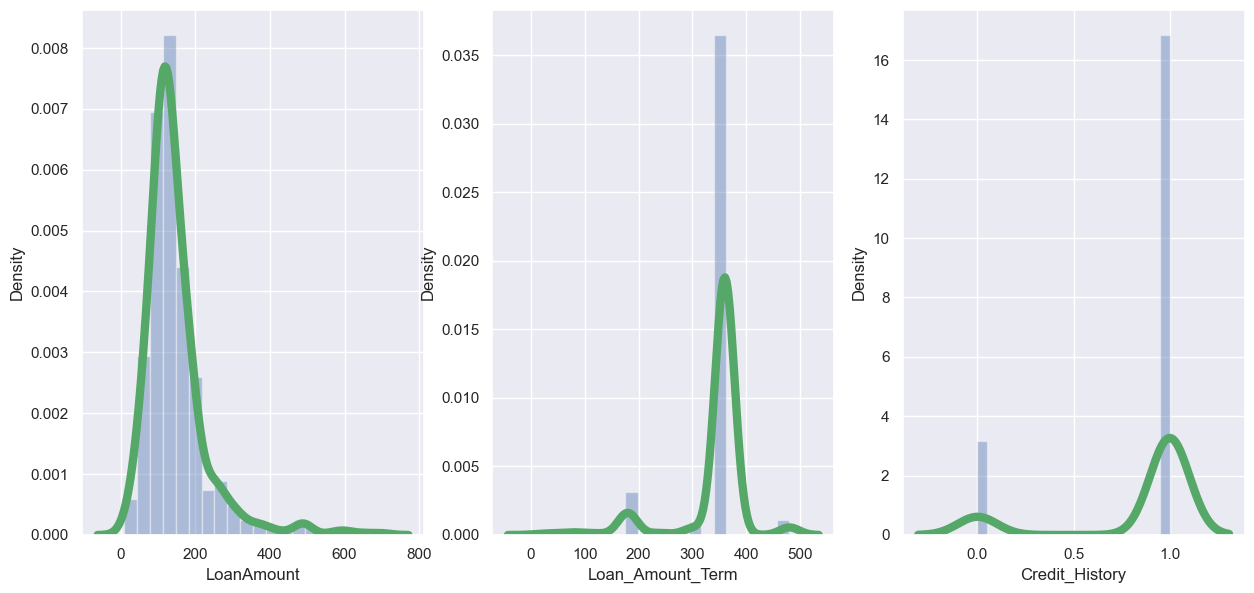

In [40]:
plt.figure(figsize=(15,15))
sns.set()
for i, var in enumerate(df2): 

    plt.subplot(2,3,i+1) 

    
    sns.distplot(df1[var], bins=20,
                 kde_kws={'linewidth':6, 'color':'g'})

In [41]:
df1_mean = df1.fillna(df1.mean()) 
#fillna() is used to fill missing values 
### now we fill it using mean

df1_mean.isnull().sum().sum()

0

C:\Users\deepa\AppData\Local\Temp\ipykernel_17452\3961679411.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
C:\Users\deepa\AppData\Local\Temp\ipykernel_17452\3961679411.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

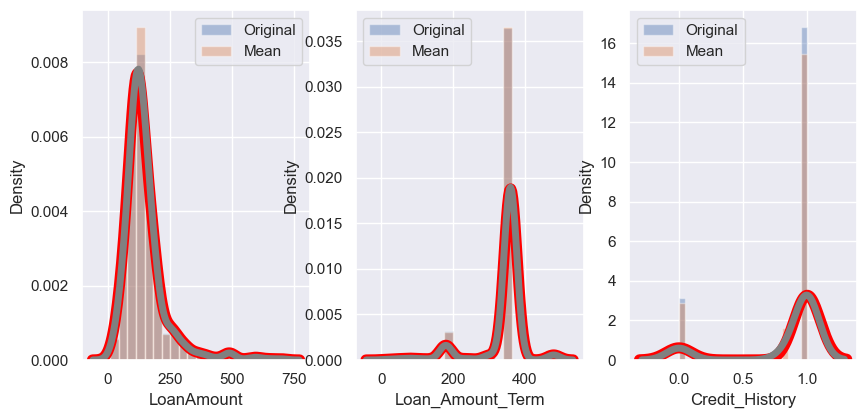

In [42]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df2):
    plt.subplot(2,3,i+1)
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
    sns.distplot(df1_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'grey'},label="Mean",)
    plt.legend()

In [43]:
df1_median = df1.fillna(df1.median())
df1_median.isnull().sum().sum()

0

In [44]:
loan_dataset.update(df1_median)
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [46]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [47]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [48]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [49]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [50]:
loan_dataset #after filling value...again check missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

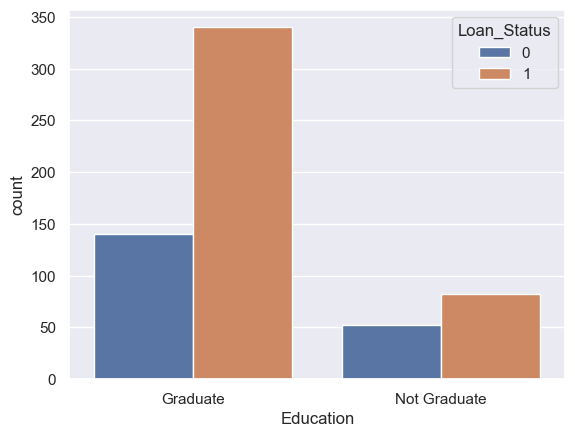

In [51]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

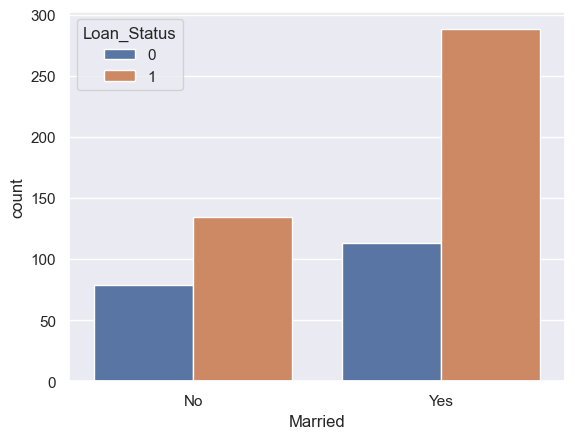

In [52]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [53]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [54]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [55]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [56]:

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [57]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [58]:
print(X.shape, X_train.shape, X_test.shape)


(614, 11) (552, 11) (62, 11)


# Training the model:

1) Support Vector Classifier

Support Vector Classification Model

In [59]:
classifier = svm.SVC(kernel='linear')

In [60]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [61]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [62]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8152173913043478


In [63]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [64]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258


# KNN Classification

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
Classifier=KNeighborsClassifier(n_neighbors=5)
Classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [67]:
Classifier.score(X_test,Y_test)

0.6451612903225806

# Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [70]:
Y_pred=classifier.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [71]:
classifier.score(X_test,Y_test)


0.7258064516129032

# Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
Y_pred=Classifier.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [74]:
cm = confusion_matrix(Y_test,Y_pred)

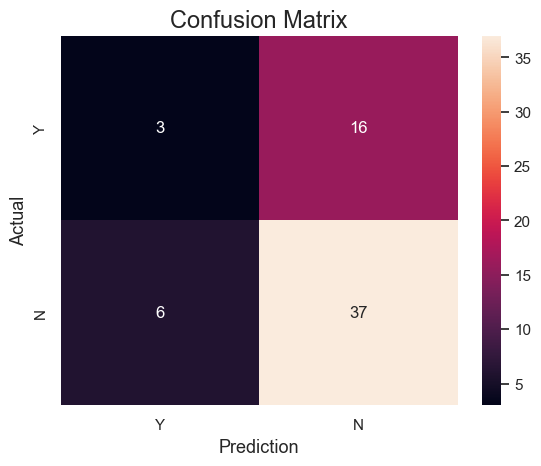

In [75]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Y', 'N'],
            yticklabels=['Y', 'N'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [76]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.6451612903225806


In [77]:
precision=precision_score(Y_test,Y_pred,average='micro')
print(precision)

0.6451612903225806


In [78]:
recall=recall_score(Y_test,Y_pred,average='micro')
print(recall)

0.6451612903225806


In [79]:
F1_score=f1_score(Y_test,Y_pred,
                 average='micro')
print(F1_score)

0.6451612903225806
